## Import packages

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

"""
This code is used for Fig2.F. Cumulative distribution of U.S. counties by facility-based accessibility across three facility types.
Data: Facility-based accessibility across three facility types
"""

'\nThis code is used for Fig2.F. Cumulative distribution of U.S. counties by facility-based accessibility across three facility types.\nData: Facility-based accessibility across three facility types\n'

## Data Processing

In [2]:
def read_evse_excel_data(filename="Facility_based_acc_by_facility_2024.csv"):
    """
    Read EVSE data from Excel file.
    """
    all_sheets = pd.read_csv(filename)
    return all_sheets

## Mapping and Visualization

In [3]:
def plot_facility_accessibility_distribution(matched_gdf, plot_type='both', figsize_dict=None):
    """
    Plot facility-based accessibility distribution using median lines and/or CDF curves.
    """
    
    # Define columns and settings
    columns = [
        'Average_Accessibility _poi_count_C1',
        'Average_Accessibility _poi_count_C2', 
        'Average_Accessibility _poi_count_C3',
    ]
    
    poi_display_names = {
        'Average_Accessibility _poi_count_C1': 'Administrative and Public Facilities',
        'Average_Accessibility _poi_count_C2': 'Commercial and Business Facilities', 
        'Average_Accessibility _poi_count_C3': 'Leisure and Tourism Facilities',
    }
    
    # Define visual settings
    custom_colors = ["brown", "#293890", "#018A67", "#F3A332", "#DE582B"]
    colors = custom_colors[:len(columns)]
    line_styles = ['-', '-', '--', '-', '-']
    
    # Set default figure sizes
    if figsize_dict is None:
        figsize_dict = {
            'median': (4.2, 0.45),
            'cdf': (8, 5)
        }
    
    figures = {}
    
    def plot_median_lines():
        """Plot horizontal lines showing median values for each facility type"""
        fig_median = plt.figure(figsize=figsize_dict['median'])
        
        # Calculate median values
        median_values = matched_gdf[columns].median()
        
        # Plot median lines
        for i, (category, median_val) in enumerate(median_values.items()):
            x_start = 0.2
            x_end = 0.3
            plt.vlines(
                x=median_val,
                ymin=x_start,
                ymax=x_end,
                color=colors[i],
                linestyle=line_styles[i % len(line_styles)],
                linewidth=1.5,
                label=f"Median ({category})",
            )
        
        # Configure plot
        plt.grid(True, which='both', linestyle=':', alpha=0.4)
        plt.gca().set_facecolor('#f8f8f8')
        plt.tick_params(bottom=True, left=False, labelbottom=True, labelleft=False)
        plt.title(r'$\bf{Facility-based\ Acc.\ by\ Facility\ Types}$' + '\n' + '(Median, linear scale)', fontsize=16)
        plt.ylim(0.18, 0.32)
        plt.tight_layout()
        
        return fig_median
    
    def plot_cdf_curves():
        """Plot cumulative distribution functions for each facility type"""
        fig_cdf = plt.figure(figsize=figsize_dict['cdf'])
        
        # Plot CDF curves
        for i, col in enumerate(columns):
            sorted_data = np.sort(matched_gdf[col])
            cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
            
            plt.plot(sorted_data, cdf,
                    color=colors[i],
                    linestyle=line_styles[i % len(line_styles)],
                    linewidth=1.5,
                    alpha=0.9)
        
        # Configure plot
        plt.xlabel(r'$\bf{Facility-based\ Acc.}$' + '\n' + '(log scale)', fontsize=16)
        plt.ylabel(r'$\bf{Cumulative\ Probability}$', fontsize=16)
        plt.xscale('log')
        plt.xlim(1, 10000)
        
        # Add legend
        custom_labels = list(poi_display_names.values())
        plt.legend(labels=custom_labels,
                  bbox_to_anchor=(1.05, 1),
                  loc='upper left',
                  title='Facility Types',
                  title_fontsize=12,
                  fontsize=11,
                  frameon=True,
                  framealpha=0.9,
                  edgecolor='#333333',
                  borderpad=1)
        
        # Configure grid and limits
        plt.grid(True, which='both', linestyle=':', alpha=0.4)
        plt.gca().set_facecolor('#f8f8f8')
        plt.ylim(0.25, 1)
        plt.tight_layout()
        
        return fig_cdf

    if plot_type == 'median':
        figures['median'] = plot_median_lines()
    elif plot_type == 'cdf':
        figures['cdf'] = plot_cdf_curves()
    elif plot_type == 'both':
        figures['median'] = plot_median_lines()
        figures['cdf'] = plot_cdf_curves()
    else:
        raise ValueError("plot_type must be 'median', 'cdf', or 'both'")
    return figures if len(figures) > 1 else list(figures.values())[0]

## Test run

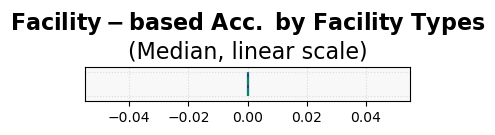

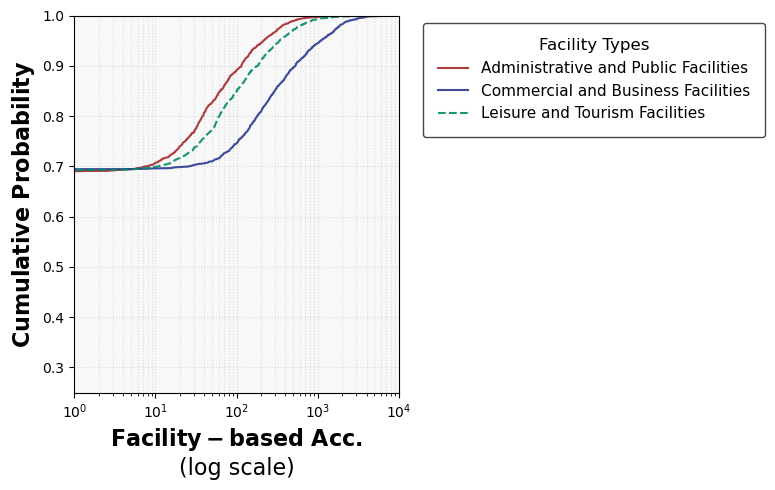

In [4]:
# 2014
if __name__ == "__main__":
    matched_gdf = read_evse_excel_data(filename="Facility_based_acc_by_facility_2014.csv")
    # Generate both plots
    figures = plot_facility_accessibility_distribution(matched_gdf, plot_type='both')
    plt.show()

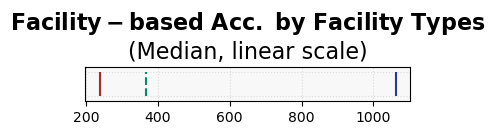

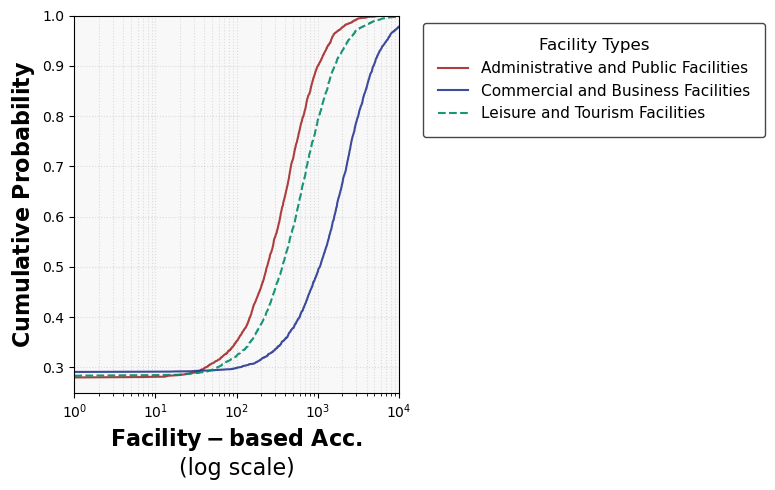

In [5]:
# 2024
if __name__ == "__main__":
    matched_gdf = read_evse_excel_data(filename="Facility_based_acc_by_facility_2024.csv")
    # Generate both plots
    figures = plot_facility_accessibility_distribution(matched_gdf, plot_type='both')
    plt.show()